In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Perceptron import *
from AdalineGD import *

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print(url)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(url , header= None , encoding= 'utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
y = df.iloc[0:100 , 4].values
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [5]:
y = np.where( y == 'Iris-setosa' , 0 , 1)

In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
x = df.iloc[0:100 , [ 0 , 2]].values
print(x)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

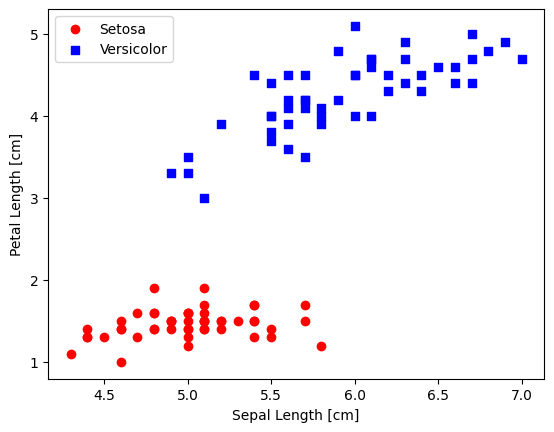

In [8]:
plt.scatter(x[0:50 , 0 ] , x[0:50 , 1] , color = 'red' , marker='o' , label = 'Setosa' )
plt.scatter( x[50 : , 0 ], x[50: , 1], color = 'blue' , marker = 's', label = 'Versicolor')
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc= 'upper left')
plt.show()

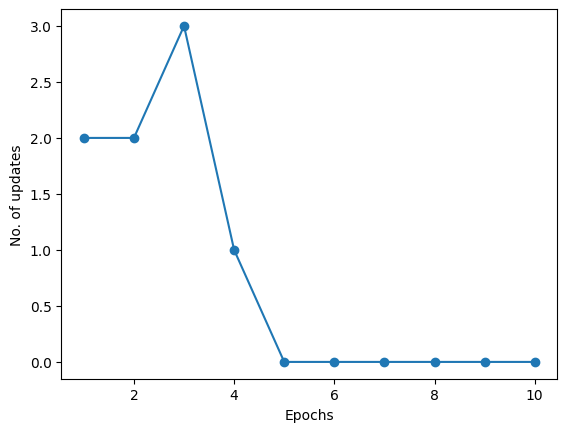

In [9]:
ppn = Perceptron(eta = 0.01 , n_iters = 10)
ppn.fit(x , y)
plt.plot(range(1 , len(ppn.errors_)+1) ,ppn.errors_,  marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('No. of updates')
plt.show()

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x , y , classifier , resolution = 0.02):
    markers = (  'o', 's' , '^', 'v', '<')
    colors = ('red' , 'blue' , 'lightgreen','gray', 'cyan')
    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min , x1_max = x[:, 0].min() - 1 , x[:,0].max() +1
    x2_min , x2_max = x[:, 1].min() - 1 , x[:,1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min , x1_max, resolution),
                           np.arange(x2_min , x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1 , xx2 , lab, alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min() , xx1.max())
    plt.ylim(xx2.min() , xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0],
                    y = x[y == cl, 1],
                    alpha = 0.8 ,
                    c = colors[idx],
                    marker = markers[idx],
                    label = f'Class {cl}',
                    edgecolor = 'black')


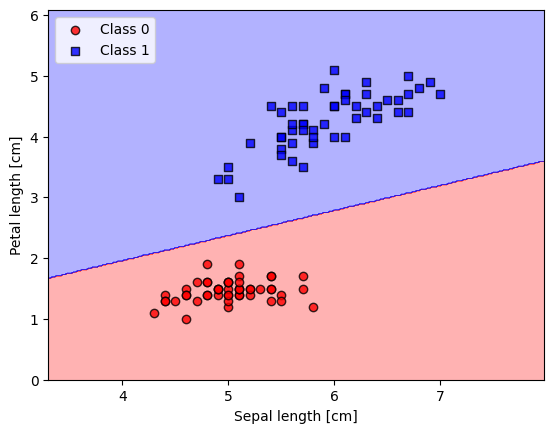

In [11]:
plot_decision_regions(x , y , classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

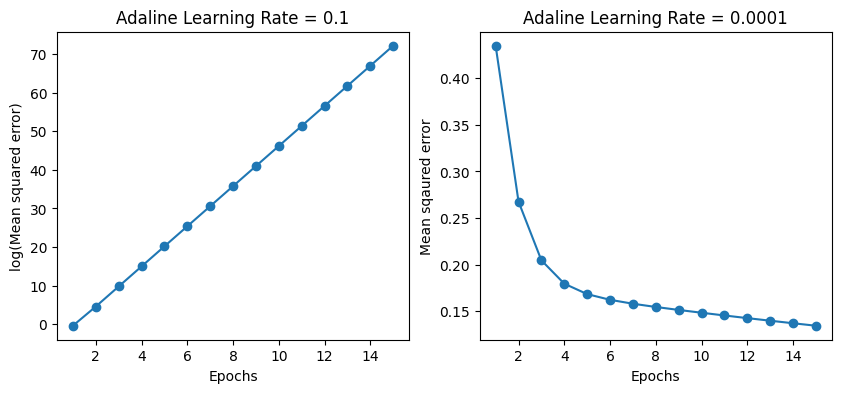

In [16]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2 , figsize = (10,4))
ada1 = AdalineGD(n_iters = 15 , eta = 0.1).fit(x, y)
ax[0].plot( range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline Learning Rate = 0.1')
ada2 = AdalineGD(n_iters = 15, eta = 0.0001).fit(x,y)
ax[1].plot(range(1 , len(ada2.losses_)+ 1), ada2.losses_, marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean sqaured error')
ax[1].set_title('Adaline Learning Rate = 0.0001')
plt.show()

In [39]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean())/ x[:,0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean())/ x[:,1].std()

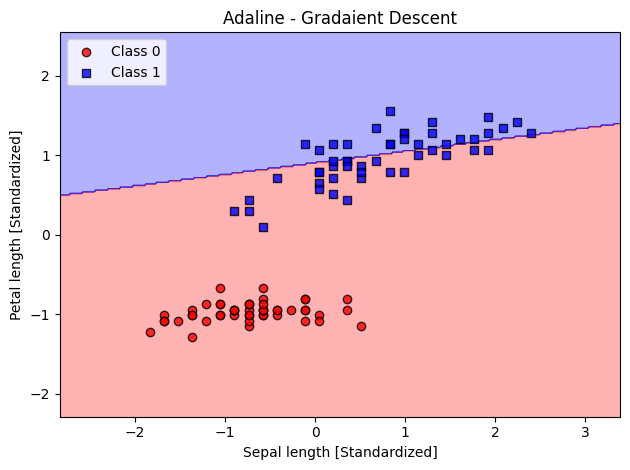

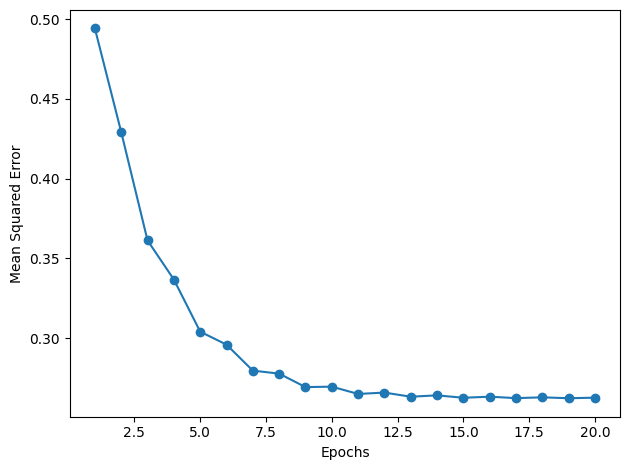

In [40]:
ada_std = AdalineGD(n_iters= 20 , eta=0.01)
ada_std.fit(x_std,y)
plot_decision_regions(x_std, y , classifier= ada_std)
plt.title('Adaline - Gradaient Descent')
plt.xlabel('Sepal length [Standardized]')
plt.ylabel('Petal length [Standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1 , len(ada_std.losses_) +1 ) , ada_std.losses_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()